In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
from rdkit.Chem import PandasTools
import glob

In [2]:
file = glob.glob('DOWN*')[0]
file

'DOWNLOAD-xGcYQgwt_pNKk1MIc1e1tXrVgnSeyqLV-X-O0an2up8=.csv'

In [3]:
df = pd.read_csv(file,on_bad_lines='skip', delimiter = ';')
df['PubMed ID']

0      28756263
1      25549897
2      21170122
3          None
4      26575458
         ...   
478    31532644
479    28633897
480    27133596
481    27326330
482    30543423
Name: PubMed ID, Length: 483, dtype: object

In [4]:
import requests
import time
import io 

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

mydata = { 'smiles' : "CC(=O)NC1=CC=C(C=C1)O" }

url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=80"

res = requests.post(url,data=mydata)

smi_search = res.text.split()

print("# Number of CIDs:", len(smi_search))
print(smi_search)

smis = smi_search[-3:]


# Number of CIDs: 22424
['1983', '403', '5931', '4754', '5827', '5288209', '12124', '31208', '14130', '11972', '7571', '7062', '5828', '1985', '74066', '67149', '23548', '22174', '11367', '7640', '7546', '7421', '7135', '3846708', '292583', '210591', '101284', '83939', '80779', '80579', '79616', '74461', '66874', '61053', '31123', '29539', '26181', '21576', '17499', '12796', '11494', '8414', '7689', '7637', '5930', '13103864', '4089912', '3292867', '2759331', '712441', '578991', '98046', '95258', '95082', '92467', '90165', '89150', '88510', '85384', '81734', '80641', '78562', '77940', '74437', '69138', '66902', '22586', '85834720', '24847789', '22621428', '15566853', '11804947', '11217901', '9887748', '9793926', '6604822', '6411017', '5374442', '5087947', '4935485', '4483147', '3322389', '3084372', '2756771', '2741326', '2735919', '2384379', '703638', '689098', '600288', '599799', '532121', '521748', '519003', '459327', '345844', '344299', '320996', '294496', '292039', '261527', '23072

In [5]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"
smi_list = []
for i in range(len(smis)):
    pugin = "compound/cid/" + smis[i]
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    smi_list.append(res.text)
    if ( i % 5 == 4 ):
        time.sleep(1)
smi_list

['CCCC(=O)NC1=CC(=C(C=C1)O)OC\n',
 'CC1=CC(=CC(=C1[O])C)NC(=O)C\n',
 'CCCC1CCN(CC1)C2=CC=C(C=C2)O\n']

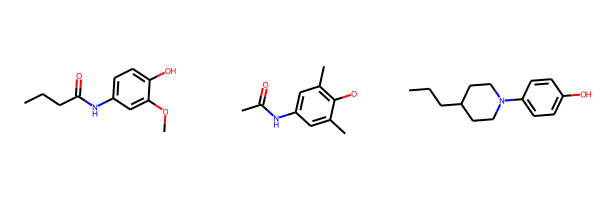

In [6]:
mol_list = []
for s in smi_list[-3:]:
    can_smi = Chem.MolToSmiles(Chem.MolFromSmiles(s))
    m = Chem.MolFromSmiles(can_smi)
    mol_list.append(m)
Draw.MolsToGridImage(mol_list)

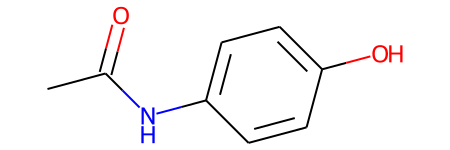

In [7]:
imat_smil = Chem.MolToSmiles(Chem.MolFromSmiles('CC(=O)NC1=CC=C(C=C1)O'))
imat = Chem.MolFromSmiles(imat_smil)
imat

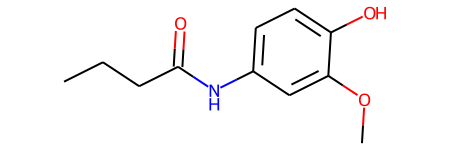

In [8]:
mol_list[0]

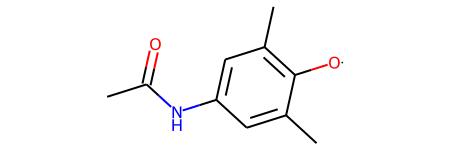

In [9]:
mol_list[1]

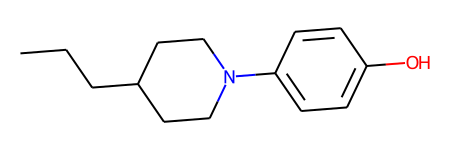

In [10]:
mol_list[2]